<a href="https://colab.research.google.com/github/Shahid-TheMatrixMaker/100-Data-Science-Project/blob/main/Big_data_analytics(NYC_taxi_trip_duration).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark
# Importing necessary libraries
from pyspark.sql import SparkSession

# Creating a SparkSession
spark = SparkSession.builder.appName("BigDataAnalytics").getOrCreate()

# Reading the dataset
data = spark.read.csv("nyc_taxi_trip_duration.csv", header=True, inferSchema=True)

# Displaying the dataset schema
data.printSchema()

root
 |-- id: string (nullable = true)
 |-- vendor_id: integer (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)
 |-- dropoff_longitude: string (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- trip_duration: double (nullable = true)



In [3]:
# Counting the number of records in the dataset
record_count = data.count()
print("Number of records:", record_count)

Number of records: 1405272


In [4]:
# Summary statistics of the trip duration
data.describe("trip_duration").show()

+-------+------------------+
|summary|     trip_duration|
+-------+------------------+
|  count|           1405266|
|   mean| 960.6385712514409|
| stddev|5307.2626194870045|
|    min| -74.0025863647461|
|    max|         3526282.0|
+-------+------------------+



In [5]:
# Dropping irrelevant columns
data = data.drop("id", "vendor_id",  "dropoff_datetime", "store_and_fwd_flag")

In [7]:
# Handling missing values
data = data.dropna()

In [8]:
# Checking for duplicates
duplicate_count = data.count() - data.dropDuplicates().count()
print("Number of duplicates:", duplicate_count)

Number of duplicates: 7


In [9]:
data.printSchema()

root
 |-- pickup_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)
 |-- dropoff_longitude: string (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- trip_duration: double (nullable = true)



In [10]:
# Importing necessary libraries
from pyspark.sql.functions import col, hour, dayofweek

In [11]:
# Adding new features
data = data.withColumn("pickup_hour", hour(col("pickup_datetime")))
data = data.withColumn("pickup_dayofweek", dayofweek(col("pickup_datetime")))

In [12]:
# Aggregating and summarizing data
avg_duration_by_hour = data.groupBy("pickup_hour").avg("trip_duration").orderBy("pickup_hour")
avg_duration_by_day = data.groupBy("pickup_dayofweek").avg("trip_duration").orderBy("pickup_dayofweek")

In [13]:
# Displaying the results
avg_duration_by_hour.show()
avg_duration_by_day.show()

+-----------+------------------+
|pickup_hour|avg(trip_duration)|
+-----------+------------------+
|          0| 940.1783214738279|
|          1| 905.2830772542583|
|          2| 893.5509886114924|
|          3| 892.6217542120912|
|          4| 917.2844646145751|
|          5| 826.0058958174377|
|          6| 801.4365722838967|
|          7| 832.3298182089663|
|          8| 924.7684474046143|
|          9| 930.8332131735975|
|         10| 934.1298833079655|
|         11| 969.6136118986612|
|         12|  995.394534697007|
|         13|1031.7570278439432|
|         14|1079.1338143378498|
|         15|1120.5581647398844|
|         16|1079.5566256896718|
|         17|1030.7646292653144|
|         18| 982.6789967789636|
|         19| 892.9769751291901|
+-----------+------------------+
only showing top 20 rows

+----------------+------------------+
|pickup_dayofweek|avg(trip_duration)|
+----------------+------------------+
|               1| 905.5598295380654|
|               2| 897.8354573

In [14]:
# Importing necessary libraries
import matplotlib.pyplot as plt

In [15]:
# Converting DataFrame to Pandas DataFrame for visualization
pandas_data = data.toPandas()

In [16]:
pandas_data.head()

,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,pickup_dayofweek
0,2016-03-14 17:24:55,1,-73.982154846191406,40.767936706542969,-73.964630126953125,40.765602111816406,455.0,17,2
1,2016-06-12 00:43:35,1,-73.980415344238281,40.738563537597656,-73.999481201171875,40.731151580810547,663.0,0,1
2,2016-01-19 11:35:24,1,-73.979026794433594,40.763938903808594,-74.005332946777344,40.710086822509766,2124.0,11,3
3,2016-04-06 19:32:31,1,-74.010040283203125,40.719970703125,-74.01226806640625,40.706718444824219,429.0,19,4
4,2016-03-26 13:30:55,1,-73.973052978515625,40.793209075927734,-73.972923278808594,40.782520294189453,435.0,13,7


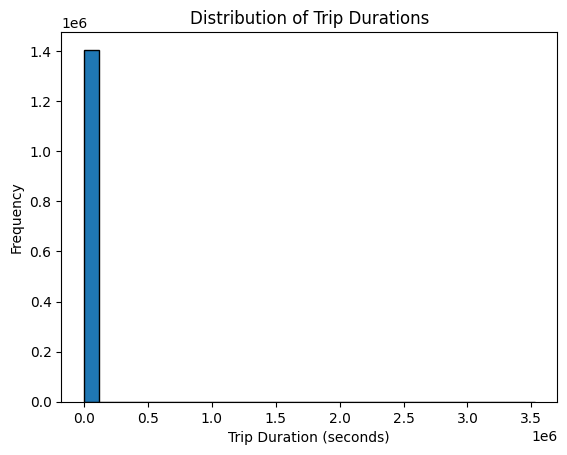

In [17]:
# Plotting trip duration distribution
plt.hist(pandas_data["trip_duration"], bins=30, edgecolor="black")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Durations")
plt.show()

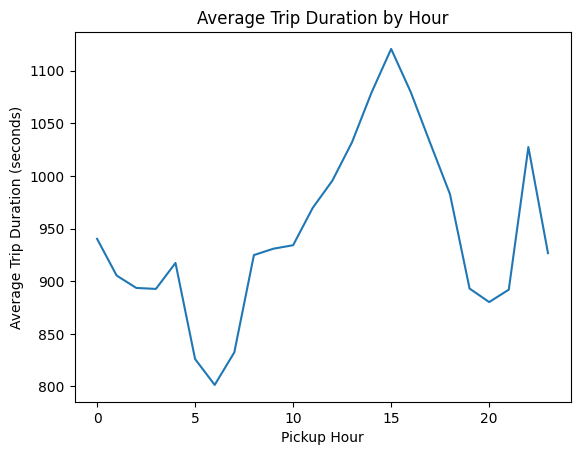

In [18]:
# Plotting average trip duration by hour
plt.plot(avg_duration_by_hour.toPandas()["pickup_hour"], avg_duration_by_hour.toPandas()["avg(trip_duration)"])
plt.xlabel("Pickup Hour")
plt.ylabel("Average Trip Duration (seconds)")
plt.title("Average Trip Duration by Hour")
plt.show()